In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [44]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]


for var in vars:
    
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res1/{}.txt".format(var)
    dir = "/home/rita13santos/Desktop/run23/{}.txt".format(var)
    
    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                                              

        
        
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        xi_ori.append(auxdata[3])
                        xi_scri.append(auxdata[L-4])
                    elif k==4:
                        derxi_ori.append(auxdata[3])
                        derxi_scri.append(auxdata[L-4])
                    elif k==5:
                        derderxi_ori.append(np.max(auxdata[3]))
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/run23/m.txt
/home/rita13santos/Desktop/run23/beta.txt
/home/rita13santos/Desktop/run23/xi.txt
/home/rita13santos/Desktop/run23/derxi.txt
/home/rita13santos/Desktop/run23/derderxi.txt


In [45]:
len(time)

1529

####

# Styling plots

In [46]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [47]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

# Chi at origin

Value of Derpsi at the origin over time

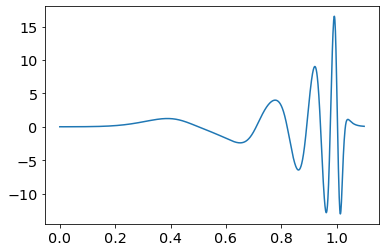

In [48]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [50]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
print(roots[k:(k+3)+1])

k=3
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  8
[0.70973482 0.82149687 0.89190877 0.94211393]

Tau star is  1.0699766807316928
Tau* is u* in my report

Delta is  0.6624151638450502


In [41]:
Delta=0.6
#tau_star=0.8575751683709906


In [51]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

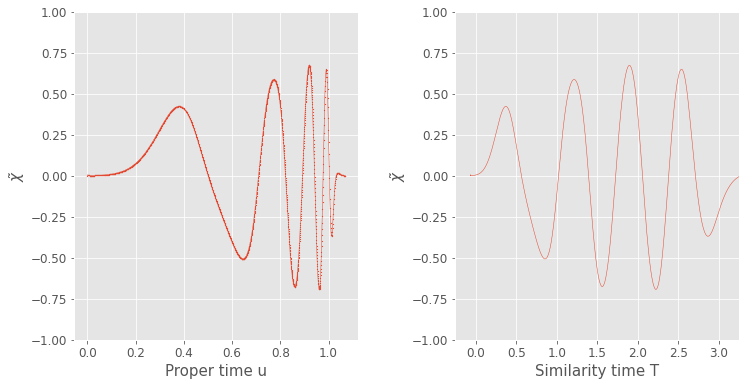

In [57]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i]
    chitilde.append(aux)
    i=i+1

with plt.style.context('ggplot'):
    """plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)"""
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    #ax1.plot(time,np.multiply(1/2,derderxi_ori),linewidth=0.5)
    #ax1.scatter(time,np.multiply(1/2,derderxi_ori),s=0.5)
    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_ylim([-1,1])
    ax1.set_xlabel("Proper time u",fontsize=15)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=15)
    ax2.set_xlim([-0.25,3.25])
    ax2.set_ylim([-1,1])
    
    #ax2.plot(adapt_time,np.multiply(1/2,derderxi_ori[0:len(adapt_time)]),linewidth=0.5)
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    #ax2.scatter(adapt_time,np.multiply(1/2,derderxi_ori[0:len(adapt_time)]),s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=15)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=15)
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

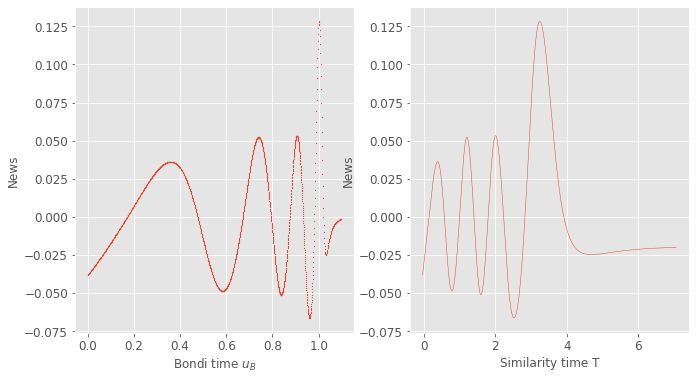

In [377]:
news=[]
for i in range(0, len(xi_scri)-1):
    new=np.exp(-2*beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    news.append(new)


    
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.scatter(time[0:len(news)],news,s=0.5)
    ax1.set_xlabel("Bondi time $u_B$")#$\u03C4$")
    ax1.set_ylabel("News")
    
    ax2.plot(adapt_time[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("Similarity time T")#Adapted time T")
    ax2.set_ylabel("News")
    #ax2.set_xlim([0.,4])
    
    
    plt.show()

m at scri+

/tmp/ipykernel_7934/2034549169.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([0.01,0])


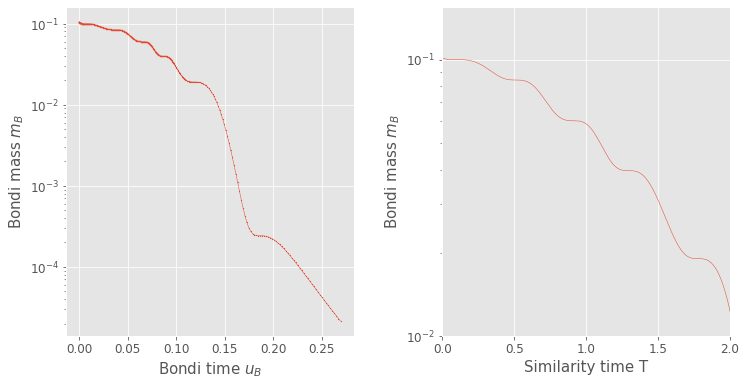

In [357]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(bonditime[0:len(mplt)],mplt,s=0.5)
    ax1.plot(bonditime[0:len(mplt)],mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=15)
    #ax1.set_xlim([.8,1.04])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=15)#$\u03C4$")
    
    # adapt time
    
    ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.set_yscale('log')
    ax2.set_xlim([0,2])
    ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=15)
    ax2.set_xlabel("Similarity time T", fontsize=15)

    fig.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [332]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-2*math.exp(-2*beta_scri[i])*math.pi*4*deruxi[i]**2
    massloss.append(aux)



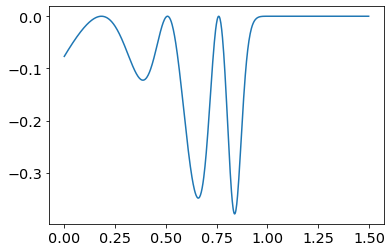

In [333]:
plt.plot(time[0:len(massloss)], massloss)

In [313]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

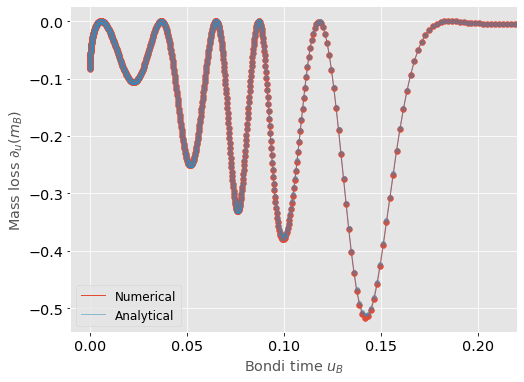

In [314]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,s=35)
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    #plt.plot(adapt_time[0:len(adapt_time)],masslossexp[0:len(adapt_time)],label='Numerical',linewidth=1)
    #plt.plot(adapt_time,massloss[0:len(adapt_time)],label='Analytical',linewidth=1,alpha=0.5)
    
    plt.xlim(-0.01, 0.22)
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

In [227]:
redshift=[]
for i in range(0, len(beta)):
    redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1) #saving derpsi at the origin for each timestep

    
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("Redshift factor")
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("T")
    ax2.set_ylabel("Redshift factor")
    
    
    
    plt.show()

NameError: name 'beta' is not defined

Bondi mass at scri+

In [228]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    
    plt.show()

NameError: name 'derpsi' is not defined

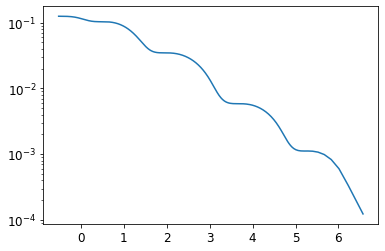

In [84]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')